# Big Data Mart Sales Problem

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings(action='ignore')

import seaborn as sns
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings(action='ignore')
import seaborn as sns
from pandas.plotting import scatter_matrix
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

from sklearn import tree

In [2]:
train=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv")
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
train.shape


(5681, 11)

In [6]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [9]:
test=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv")
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [10]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [11]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [12]:
test.shape

(5681, 11)

In [13]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [14]:
test.isnull().sum()


Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [15]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


<AxesSubplot:>

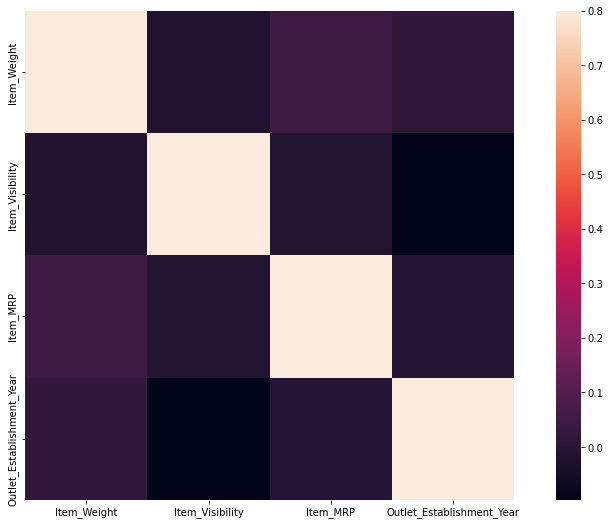

In [16]:
#now plot correlation matrix
correl=train.corr()
ax=plt.subplots(figsize=(15,9))
sns.heatmap(correl,vmax=0.8,square=True)

In [17]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [18]:
train.Item_Fat_Content.value_counts()  #need to optimize

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [19]:
train.Item_Type.value_counts()

Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64

In [20]:
train.Outlet_Identifier.value_counts()

OUT027    624
OUT013    621
OUT049    620
OUT046    620
OUT035    620
OUT045    619
OUT018    618
OUT017    617
OUT010    370
OUT019    352
Name: Outlet_Identifier, dtype: int64

In [21]:
train.Outlet_Size.value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [22]:
train.Outlet_Location_Type.value_counts()

Tier 3    2233
Tier 2    1856
Tier 1    1592
Name: Outlet_Location_Type, dtype: int64

In [23]:
train.Outlet_Type.value_counts()

Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
Name: Outlet_Type, dtype: int64

In [24]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [25]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

<AxesSubplot:>

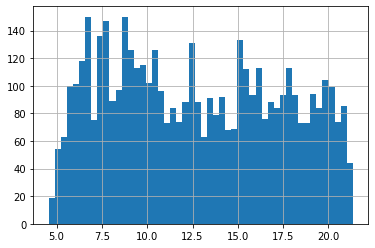

In [26]:
train.Item_Weight.hist(bins=50)

<AxesSubplot:>

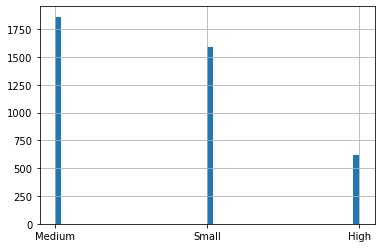

In [27]:
train.Outlet_Size.hist(bins=50)


In [28]:
train.Outlet_Size.value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [33]:
data=train.append(test)


In [34]:
data.shape

(11362, 11)

In [35]:
data.isnull().sum()


Item_Identifier                 0
Item_Weight                  1952
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  3212
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [36]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1952
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  3212
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

<AxesSubplot:>

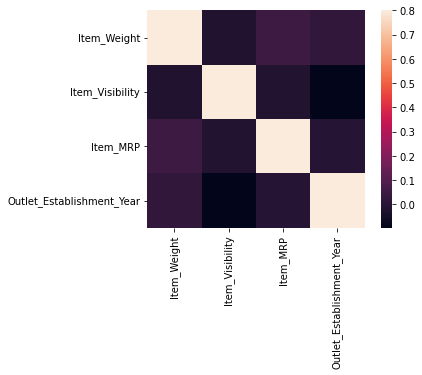

In [37]:
correlation=data.corr()
sns.heatmap(correlation,vmax=.8,square=True)

In [38]:
data.apply(lambda x:len(x.unique()))

Item_Identifier              1543
Item_Weight                   411
Item_Fat_Content                5
Item_Visibility              5277
Item_Type                      16
Item_MRP                     4402
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

In [39]:
data.dtypes


Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [40]:
data.dtypes.index

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [42]:
categorical_columns=[x for x in data.dtypes.index if data.dtypes[x]=='object']
categorical_columns

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [43]:
categorical_columns=[x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier']]
categorical_columns

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [44]:
#print frequencies of these categories
for col in categorical_columns:
    print('frequency of categories for variable')
    print(data[col].value_counts())

frequency of categories for variable
Low Fat    6792
Regular    3870
LF          412
reg         156
low fat     132
Name: Item_Fat_Content, dtype: int64
frequency of categories for variable
Snack Foods              1578
Fruits and Vegetables    1562
Household                1276
Frozen Foods             1140
Dairy                     908
Baking Goods              876
Canned                    870
Health and Hygiene        676
Meat                      622
Soft Drinks               562
Breads                    330
Hard Drinks               296
Starchy Foods             242
Others                    222
Breakfast                 152
Seafood                    50
Name: Item_Type, dtype: int64
frequency of categories for variable
Medium    3724
Small     3184
High      1242
Name: Outlet_Size, dtype: int64
frequency of categories for variable
Tier 3    4466
Tier 2    3712
Tier 1    3184
Name: Outlet_Location_Type, dtype: int64
frequency of categories for variable
Supermarket Type1    7434

In [45]:
data.Item_Weight.fillna(data.Item_Weight.mean(),inplace=True)

In [46]:
#import mode function
from scipy.stats import mode

#determining the mode of each 
data.Outlet_Size=data.Outlet_Size.map({'Small':0,'Medium':1,'High':2})
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]) )
miss_bool = data['Outlet_Size'].isnull() 
data.loc[miss_bool,'Outlet_Size'] = data.loc[miss_bool,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [47]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [48]:
for i in data.dtypes.index:
    if len(data[i].value_counts())<30:
        print(i,"\n",data[i].value_counts())


Item_Fat_Content 
 Low Fat    6792
Regular    3870
LF          412
reg         156
low fat     132
Name: Item_Fat_Content, dtype: int64
Item_Type 
 Snack Foods              1578
Fruits and Vegetables    1562
Household                1276
Frozen Foods             1140
Dairy                     908
Baking Goods              876
Canned                    870
Health and Hygiene        676
Meat                      622
Soft Drinks               562
Breads                    330
Hard Drinks               296
Starchy Foods             242
Others                    222
Breakfast                 152
Seafood                    50
Name: Item_Type, dtype: int64
Outlet_Identifier 
 OUT027    1248
OUT013    1242
OUT049    1240
OUT046    1240
OUT035    1240
OUT045    1238
OUT018    1236
OUT017    1234
OUT010     740
OUT019     704
Name: Outlet_Identifier, dtype: int64
Outlet_Establishment_Year 
 1985    1952
1987    1242
1999    1240
1997    1240
2004    1240
2002    1238
2009    1236
2007    1234
19

<AxesSubplot:>

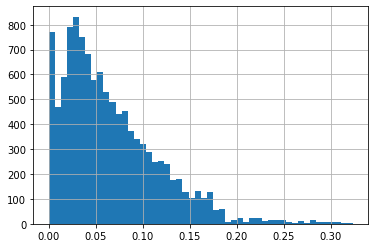

In [50]:
data.Item_Visibility.hist(bins=50)

In [51]:
data.Item_Visibility.mean()


0.06568385968808328

In [52]:
data.loc[data['Item_Visibility']==0,'Item_Visibility']=data.Item_Visibility.mean()

In [53]:
data.Item_Type.value_counts()

Snack Foods              1578
Fruits and Vegetables    1562
Household                1276
Frozen Foods             1140
Dairy                     908
Baking Goods              876
Canned                    870
Health and Hygiene        676
Meat                      622
Soft Drinks               562
Breads                    330
Hard Drinks               296
Starchy Foods             242
Others                    222
Breakfast                 152
Seafood                    50
Name: Item_Type, dtype: int64

In [54]:
data['Item_Type_Combined']=data.Item_Identifier.apply(lambda x:x[0:2])
data['Item_Type_Combined'].value_counts()

FD    8152
NC    2174
DR    1036
Name: Item_Type_Combined, dtype: int64

In [55]:
data['Item_Type_Combined']=data.Item_Identifier.apply(lambda x:x[0:2])
data['Item_Type_Combined'].value_counts()

FD    8152
NC    2174
DR    1036
Name: Item_Type_Combined, dtype: int64

In [56]:
data['Item_Type_Combined'].value_counts()


FD    8152
NC    2174
DR    1036
Name: Item_Type_Combined, dtype: int64

In [57]:
data['Outlet_Years']=2013-data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()


count    11362.000000
mean        15.171097
std          8.371887
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [58]:
data.Item_Fat_Content.value_counts()

Low Fat    6792
Regular    3870
LF          412
reg         156
low fat     132
Name: Item_Fat_Content, dtype: int64

In [59]:
data.Item_Fat_Content=data.Item_Fat_Content.replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
data.Item_Fat_Content.value_counts()

Low Fat    7336
Regular    4026
Name: Item_Fat_Content, dtype: int64

In [60]:
data.loc[data['Item_Type_Combined']=='Non-Consumable','Item_Fat_Content']='Non-Edible'

In [61]:
data.Item_Fat_Content.value_counts()

Low Fat    7336
Regular    4026
Name: Item_Fat_Content, dtype: int64

In [62]:
data.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined,Outlet_Years
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,1.0,Tier 1,Supermarket Type1,FD,14
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,2007,0.0,Tier 2,Supermarket Type1,FD,6
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,0.0,Tier 3,Grocery Store,NC,15
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,0.0,Tier 2,Supermarket Type1,FD,6
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,1.0,Tier 3,Supermarket Type3,FD,28


In [63]:
#import library 
#now import labelEncoding
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
data['Outlet']=lb.fit_transform(data['Outlet_Identifier'])
var=['Item_Fat_Content','Outlet_Location_Type','Outlet_Type','Outlet_Size','Item_Type_Combined']
lb=LabelEncoder()
for item in var:
    data[item]=lb.fit_transform(data[item])

In [65]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined,Outlet_Years,Outlet
0,FDW58,20.750000,0,0.007565,Snack Foods,107.8622,OUT049,1999,1,0,1,1,14,9
1,FDW14,8.300000,1,0.038428,Dairy,87.3198,OUT017,2007,0,1,1,1,6,2
2,NCN55,14.600000,0,0.099575,Others,241.7538,OUT010,1998,0,2,0,2,15,0
3,FDQ58,7.315000,0,0.015388,Snack Foods,155.0340,OUT017,2007,0,1,1,1,6,2
4,FDY38,12.695633,1,0.118599,Dairy,234.2300,OUT027,1985,1,2,3,1,28,5


In [66]:
data.drop(['Outlet_Establishment_Year','Item_Type'],inplace=True,axis=1)

In [67]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined,Outlet_Years,Outlet
0,FDW58,20.750000,0,0.007565,107.8622,OUT049,1,0,1,1,14,9
1,FDW14,8.300000,1,0.038428,87.3198,OUT017,0,1,1,1,6,2
2,NCN55,14.600000,0,0.099575,241.7538,OUT010,0,2,0,2,15,0
3,FDQ58,7.315000,0,0.015388,155.0340,OUT017,0,1,1,1,6,2
4,FDY38,12.695633,1,0.118599,234.2300,OUT027,1,2,3,1,28,5


In [69]:
train=data.iloc[:8523,:]
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined,Outlet_Years,Outlet
0,FDW58,20.750000,0,0.007565,107.8622,OUT049,1,0,1,1,14,9
1,FDW14,8.300000,1,0.038428,87.3198,OUT017,0,1,1,1,6,2
2,NCN55,14.600000,0,0.099575,241.7538,OUT010,0,2,0,2,15,0
3,FDQ58,7.315000,0,0.015388,155.0340,OUT017,0,1,1,1,6,2
4,FDY38,12.695633,1,0.118599,234.2300,OUT027,1,2,3,1,28,5
